# CS5722 - Software Architecture

## Architecture Recovery - Phase 3

Xavier Gea Gregori (22104046)

Romans Klemanskis (22235884)

Anirudha Kanakatte Aravind (22243119)

# Architecture Recovery on the pytorch repository

This notebook is an attempt to perform topic modeling using Latent Dirichlet Allocation(LDA) on the [pytorch](https://github.com/pytorch/pytorch/tree/main/torch) repository.

It is inspired by the paper [Enhancing Architectural Recovery Using Concerns](https://www.cs.drexel.edu/~yfcai/papers/2011/ASE2011_short.pdf).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

I created a folder called arc-pytorch in my Google Drive. I can now cd in it.

In [ ]:
%cd '/content/drive/MyDrive/arc-pytorch'

Now let's clone the pytorch repository. This might take a few minutes.

In [ ]:
!git clone https://github.com/pytorch/pytorch.git

I then created a folder called pytorch-subset in the arc-pytorch directory and copied the 5 python files that we are going to study here.

- pytorch/torch/_tensor.py
- pytorch/torch/nn/functional.py
- pytorch/torch/nn/modules/activation.py
- pytorch/torch/nn/modules/conv.py
- pytorch/torch/nn/modules/transformer.py

# Obtaining Concerns through Probabilistic Topic Models

## 1. Using all the words in the python files

### Extracting all the relevant text from the files

Let's extract all the relevant text from the files using a regex in the subset folder and store it in an array called texts.

We'll first try to use all the words contained in the python files.

In [ ]:
import os
import re
import glob

# Path to PyTorch library files
path = '/content/drive/MyDrive/arc-pytorch/pytorch-subset/'

python_files = glob.glob(os.path.join(path, '**/*.py'), recursive=True)

# List to store file contents
texts = []

# Iterate through all files in the PyTorch library directory
for filename in python_files:
    if filename.endswith('.py'):
        filepath = os.path.join(path, filename)
        
        # Read file contents
        with open(filepath, 'r', encoding="utf-8") as f:
            contents = f.read()

            # Extract all words from the file
            words = re.findall(r'\w+', contents)
        
        texts.append(words)

Each item in the texts array is an array containing all the words in the python file.

In [ ]:
# These are all the words in the _tensor.py file.
texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['import',
 'copyreg',
 'import',
 'enum',
 'import',
 'functools',
 'import',
 'warnings',
 'from',
 'collections',
 'import',
 'OrderedDict',
 'from',
 'copy',
 'import',
 'deepcopy',
 'from',
 'numbers',
 'import',
 'Number',
 'from',
 'typing',
 'import',
 'Any',
 'Dict',
 'Optional',
 'Tuple',
 'Union',
 'import',
 'torch',
 'import',
 'torch',
 '_C',
 'as',
 '_C',
 'import',
 'torch',
 'utils',
 'hooks',
 'as',
 'hooks',
 'from',
 'torch',
 '_namedtensor_internals',
 'import',
 'check_serializing_named_tensor',
 'is_ellipsis',
 'resolve_ellipsis',
 'single_ellipsis_index',
 'unzip_namedshape',
 'update_names',
 'from',
 'torch',
 'overrides',
 'import',
 'get_default_nowrap_functions',
 'handle_torch_function',
 'has_torch_function',
 'has_torch_function_unary',
 'has_torch_function_variadic',
 'from',
 'torch',
 'utils',
 'dlpack',
 'import',
 'DLDeviceType',
 'def',
 '_handle_torch_function_and_wrap_type_error_to_not_implemented',
 'f',
 'assigned',
 'functools',
 'WRAPPER_ASSI

### Cleaning the texts

Let's clean the text of each entry. (This cell may take a minute to run.)

In [ ]:
def camel_or_pascal_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

def snake_case_split(identifier):
    return identifier.split("_")

filtered_texts = []
for text in texts:
  filtered_text = []
  for word in text:
    # Remove dunder function names
    if not word.startswith("__"):
      # Split snake case into multiple words
      if "_" in word:
        for subword in snake_case_split(word):
          filtered_text.append(subword.lower())
      # Split camelCase or PascalCase into multiple words
      elif not word.islower():
        for subword in camel_or_pascal_case_split(word):
          filtered_text.append(subword.lower())
      else:
        filtered_text.append(word)
      
      # Remove single character words and all-numbers words
      filtered_text = [word for word in filtered_text if len(word) > 1 and not word.isnumeric()]

  filtered_texts.append(filtered_text)

In [ ]:
filtered_texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['import',
 'copyreg',
 'import',
 'enum',
 'import',
 'functools',
 'import',
 'warnings',
 'from',
 'collections',
 'import',
 'ordered',
 'dict',
 'from',
 'copy',
 'import',
 'deepcopy',
 'from',
 'numbers',
 'import',
 'number',
 'from',
 'typing',
 'import',
 'any',
 'dict',
 'optional',
 'tuple',
 'union',
 'import',
 'torch',
 'import',
 'torch',
 'as',
 'import',
 'torch',
 'utils',
 'hooks',
 'as',
 'hooks',
 'from',
 'torch',
 'namedtensor',
 'internals',
 'import',
 'check',
 'serializing',
 'named',
 'tensor',
 'is',
 'ellipsis',
 'resolve',
 'ellipsis',
 'single',
 'ellipsis',
 'index',
 'unzip',
 'namedshape',
 'update',
 'names',
 'from',
 'torch',
 'overrides',
 'import',
 'get',
 'default',
 'nowrap',
 'functions',
 'handle',
 'torch',
 'function',
 'has',
 'torch',
 'function',
 'has',
 'torch',
 'function',
 'unary',
 'has',
 'torch',
 'function',
 'variadic',
 'from',
 'torch',
 'utils',
 'dlpack',
 'import',
 'dl',
 'device',
 'type',
 'def',
 'handle',
 'torch',


Let's now visualize the words based on their frequency.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


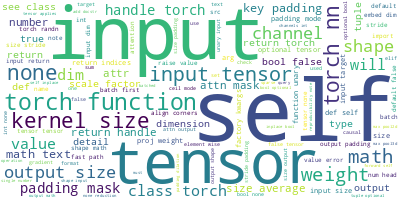

In [ ]:
flat_list = [word for filtered_text in filtered_texts for word in filtered_text]

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
filtered_string = ','.join(flat_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(filtered_string)
# Visualize the word cloud
wordcloud.to_image()

### Adding stopwords

A lot of words are very generic and irrelevant. Let's add stopwords.

The stopwords are a combination of those provided by nltk, python keywords and types, and irrelevant keywords.

Irrelevant keywords are obtained through a back and forth process of applying LDA and seeing which irrelevant words appear in a lot of topics. These words are just noise and need to be removed. We stop when the most dominant words in each topic are relevant.

In [ ]:
import keyword
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

IRRELEVANT_KW = ["torch", "self", "args", "kwargs", "*args", "**kwargs", "__init__", "python", "none", "true", "false", "type", "object", "name", "classproperty", "runtimeerror", "use", "call", "argument", "function", "isinstance", "want", "used", "dtype", "_dtype", "method", "getattr", "using","types", "ignore", "returns", "returned", "must", "see", "override", "n", "given","number", "append", "remove", "called", "instead", "create", "len", "defined", "property", "f", "key", "load", "__name__", "classes", "please", "foo", "super", "make", "length", "full", "needed", "internally", "lowering", "single", "default", "size", "input", "tensor", "output", "padding", "value", "shape", "dim", "batch", "math", "text", "attn", "attr", "repr", "index", "indices", "defines", "extra", "parameters", "module", "state", "check"]
TYPES = ["int", "float", "complex", "str", "list", "tuple", "range", "bytes", "bytearray", "memoryview", "dict", "bool", "set", "frozenset"]

STOPWORDS = list(set(list(stopwords.words()) + list(keyword.kwlist) + IRRELEVANT_KW + TYPES))

filtered_texts = [[word for word in filtered_text if word not in STOPWORDS] for filtered_text in filtered_texts]

In [ ]:
filtered_texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['copyreg',
 'enum',
 'functools',
 'warnings',
 'collections',
 'ordered',
 'copy',
 'deepcopy',
 'numbers',
 'typing',
 'optional',
 'union',
 'utils',
 'hooks',
 'hooks',
 'namedtensor',
 'internals',
 'serializing',
 'named',
 'ellipsis',
 'resolve',
 'ellipsis',
 'ellipsis',
 'unzip',
 'namedshape',
 'update',
 'names',
 'overrides',
 'nowrap',
 'functions',
 'handle',
 'unary',
 'variadic',
 'utils',
 'dlpack',
 'dl',
 'device',
 'handle',
 'wrap',
 'error',
 'implemented',
 'assigned',
 'functools',
 'wrapper',
 'assignments',
 'functools',
 'wraps',
 'assigned',
 'assigned',
 'wrapped',
 'https',
 'github',
 'pytorch',
 'pytorch',
 'issues',
 'handle',
 'wrapped',
 'error',
 'implemented',
 'wrapped',
 'loading',
 'serialized',
 'subclasses',
 'rebuild',
 'func',
 'func',
 'ret',
 'func',
 'subclass',
 'ret',
 'ret',
 'rebuild',
 'v2',
 'func',
 'ret',
 'func',
 'ret',
 'ret',
 'ret',
 'subclass',
 'define',
 'define',
 'ret',
 'ret',
 'ret',
 'utils',
 'obj',
 'ret',
 'ret',
 

Let's see if it improved.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


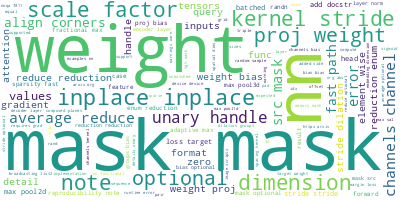

In [ ]:
flat_list = [word for filtered_text in filtered_texts for word in filtered_text]

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
filtered_string = ','.join(flat_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(filtered_string)
# Visualize the word cloud
wordcloud.to_image()

It's a bit better but not quite. Let's see what topics LDA can come up with.

### Applying LDA to extract the topics and associated words

We first need to give a numeric id to each word, and create a corpus.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(filtered_texts)
# Create Corpus
corpus = [id2word.doc2bow(text) for text in filtered_texts]

We can then apply LDA on the corpus. We can tweak the number of topics here.

In [ ]:
from pprint import pprint
# Number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=0)
# Print the words in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.027*"mask" + 0.019*"optional" + 0.015*"nn" + 0.014*"weight" + '
  '0.014*"stride" + 0.013*"kernel" + 0.013*"bias" + 0.012*"dilation" + '
  '0.012*"channels" + 0.011*"reduction"'),
 (1,
  '0.019*"kernel" + 0.018*"optional" + 0.017*"channels" + 0.016*"bias" + '
  '0.016*"stride" + 0.016*"mask" + 0.014*"weight" + 0.013*"nn" + '
  '0.013*"inplace" + 0.011*"groups"'),
 (2,
  '0.015*"optional" + 0.012*"mask" + 0.011*"handle" + 0.011*"weight" + '
  '0.010*"nn" + 0.010*"names" + 0.009*"reduction" + 0.009*"error" + '
  '0.008*"storage" + 0.008*"stride"'),
 (3,
  '0.019*"mask" + 0.018*"optional" + 0.014*"weight" + 0.013*"nn" + '
  '0.013*"inplace" + 0.012*"reduction" + 0.012*"max" + 0.011*"target" + '
  '0.009*"average" + 0.009*"bias"'),
 (4,
  '0.028*"mask" + 0.014*"optional" + 0.012*"layer" + 0.011*"src" + '
  '0.010*"weight" + 0.010*"norm" + 0.008*"bias" + 0.008*"tgt" + 0.008*"stride" '
  '+ 0.007*"kernel"')]


Let's now visualize the topics.

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/arc-pytorch'+str(num_topics))
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.003346 -0.011851       1        1  56.255627
1     -0.027996 -0.010326       2        1  21.911059
2      0.028963 -0.015158       3        1  11.464342
4      0.017804  0.020650       4        1   9.109625
0     -0.015425  0.016685       5        1   1.259347, topic_info=         Term        Freq       Total Category  logprob  loglift
826      mask  409.000000  409.000000  Default  30.0000  30.0000
393  optional  384.000000  384.000000  Default  29.0000  29.0000
849        nn  269.000000  269.000000  Default  28.0000  28.0000
964    weight  296.000000  296.000000  Default  27.0000  27.0000
569    stride  226.000000  226.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
691   average    1.641037  164.733666   Topic5  -5.1241  -0.2344
966   weights    1.553470  148.235984   Topic5  -5.1789  -0.1837
334      loss    1.597627  162.524173   Topic5  -5.1509  -0.2477
280   inplace    1.706396  250.119046   Topic5  -5.0850  -0.6130
474    reduce    1.431416  122.409574   Topic5  -5.2607  -0.0741

[373 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1151      1  0.461854  04745v1
1151      4  0.461854  04745v1
669       1  0.660460       3d
669       2  0.191747       3d
669       3  0.085221       3d
...     ...       ...      ...
970       1  0.385489    zeros
970       2  0.411188    zeros
970       3  0.102797    zeros
970       4  0.077098    zeros
970       5  0.025699    zeros

[863 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 1])

Even when adjusting the relevance metric lambda to a low value, we note that a lot of words are too generic and appear in all of the topics. Too many words are not relevant to define distinct topics.

Let's take another approach and start over, this time taking only class and function names from the python files.

## 2. Using class and function names

### Extracting all the relevant text from the files

Let's extract all the relevant text from the files using a regex in the subset folder and store it in an array called texts.

We'll now try extracting only the class and function names.

In [ ]:
import os
import re
import glob

# Path to PyTorch library files
path = '/content/drive/MyDrive/arc-pytorch/pytorch-subset'

python_files = glob.glob(os.path.join(path, '**/*.py'), recursive=True)

# List to store relevant texts
texts = []

# Regular expression pattern for matching class and function names
class_func_pattern = r'((?:(?<=class\s)|(?<=def\s))\w+)'

# Iterate through all files in the PyTorch library directory
for filename in python_files:
    if filename.endswith('.py'):
        filepath = os.path.join(path, filename)
        
        # Read file contents
        with open(filepath, 'r', encoding="utf-8") as f:
            contents = f.read()
        
        # Extract relevant texts using regular expressions
        text = re.findall(class_func_pattern, contents)

        texts.append(text)

In [ ]:
# These are all the class and function names in the tensor.py file.
texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['_handle_torch_function_and_wrap_type_error_to_not_implemented',
 'wrapped',
 '_rebuild_from_type',
 '_rebuild_from_type_v2',
 'Tensor',
 'Tensor',
 '__deepcopy__',
 'types',
 'or',
 'types',
 'or',
 '__reduce_ex__',
 'storage',
 '_typed_storage',
 '_reduce_ex_internal',
 '__setstate__',
 '__repr__',
 'backward',
 'register_hook',
 'reinforce',
 'trim',
 'is_shared',
 'share_memory_',
 '__reversed__',
 'norm',
 'solve',
 'lstsq',
 'eig',
 'symeig',
 'lu',
 'stft',
 'istft',
 'resize',
 'resize_as',
 'split',
 'unique',
 'unique_consecutive',
 '__rsub__',
 '__rdiv__',
 '__rmod__',
 '__format__',
 '__rpow__',
 '__floordiv__',
 '__rfloordiv__',
 '__rlshift__',
 '__rrshift__',
 '__rmatmul__',
 '__len__',
 '__iter__',
 '__hash__',
 'if',
 '__dir__',
 '__array__',
 '__array_wrap__',
 '__contains__',
 '__cuda_array_interface__',
 'storage_type',
 'refine_names',
 'align_to',
 'unflatten',
 'rename_',
 'rename',
 'to_sparse_coo',
 '_update_names',
 '__torch_function__',
 'instance',
 '__dlpac

### Cleaning the texts

Let's clean the text of each entry. (This cell may take a minute to run.)

In [ ]:
def camel_or_pascal_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

def snake_case_split(identifier):
    return identifier.split("_")

filtered_texts = []
for text in texts:
  filtered_text = []
  for word in text:
    # Remove dunder function names
    if not word.startswith("__"):
      # Split snake case into multiple words
      if "_" in word:
        for subword in snake_case_split(word):
          filtered_text.append(subword.lower())
      # Split camelCase or PascalCase into multiple words
      elif not word.islower():
        for subword in camel_or_pascal_case_split(word):
          filtered_text.append(subword.lower())
      else:
        filtered_text.append(word)
      
      # Remove single character words and all-numbers words
      filtered_text = [word for word in filtered_text if len(word) > 1 and not word.isnumeric()]

  filtered_texts.append(filtered_text)

In [ ]:
filtered_texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['handle',
 'torch',
 'function',
 'and',
 'wrap',
 'type',
 'error',
 'to',
 'not',
 'implemented',
 'wrapped',
 'rebuild',
 'from',
 'type',
 'rebuild',
 'from',
 'type',
 'v2',
 'tensor',
 'tensor',
 'types',
 'or',
 'types',
 'or',
 'storage',
 'typed',
 'storage',
 'reduce',
 'ex',
 'internal',
 'backward',
 'register',
 'hook',
 'reinforce',
 'trim',
 'is',
 'shared',
 'share',
 'memory',
 'norm',
 'solve',
 'lstsq',
 'eig',
 'symeig',
 'lu',
 'stft',
 'istft',
 'resize',
 'resize',
 'as',
 'split',
 'unique',
 'unique',
 'consecutive',
 'if',
 'storage',
 'type',
 'refine',
 'names',
 'align',
 'to',
 'unflatten',
 'rename',
 'rename',
 'to',
 'sparse',
 'coo',
 'update',
 'names',
 'instance',
 'convert']

Let's visualize the words based on their frequency

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


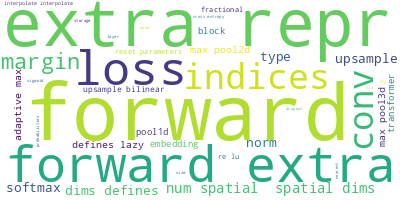

In [ ]:
flat_list = [word for filtered_text in filtered_texts for word in filtered_text]

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
filtered_string = ','.join(flat_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(filtered_string)
# Visualize the word cloud
wordcloud.to_image()

### Adding stopwords

A lot of words are very generic and irrelevant. Let's add stopwords.

The stopwords are a combination of those provided by nltk, python keywords and types, and irrelevant keywords.

Irrelevant keywords are obtained through a back and forth process of applying LDA and seeing which irrelevant words appear in a lot of topics. These words are just noise and need to be removed. We stop when the most dominant words in each topic are relevant.

In [ ]:
import keyword
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

IRRELEVANT_KW = ["torch", "self", "args", "kwargs", "*args", "**kwargs", "__init__", "python", "none", "true", "false", "type", "object", "name", "classproperty", "runtimeerror", "use", "call", "argument", "function", "isinstance", "want", "used", "dtype", "_dtype", "method", "getattr", "using","types", "ignore", "returns", "returned", "must", "see", "override", "n", "given","number", "append", "remove", "called", "instead", "create", "len", "defined", "property", "f", "key", "load", "__name__", "classes", "please", "foo", "super", "make", "length", "full", "needed", "internally", "lowering", "single", "default", "size", "input", "tensor", "output", "padding", "value", "shape", "dim", "batch", "math", "text", "attn", "attr", "repr", "index", "indices", "defines", "extra", "parameters", "module", "state", "check"]
TYPES = ["int", "float", "complex", "str", "list", "tuple", "range", "bytes", "bytearray", "memoryview", "dict", "bool", "set", "frozenset"]

STOPWORDS = list(set(list(stopwords.words()) + list(keyword.kwlist) + IRRELEVANT_KW + TYPES))

filtered_texts = [[word for word in filtered_text if word not in STOPWORDS] for filtered_text in filtered_texts]

In [ ]:
filtered_texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['handle',
 'wrap',
 'error',
 'implemented',
 'wrapped',
 'rebuild',
 'rebuild',
 'v2',
 'storage',
 'typed',
 'storage',
 'reduce',
 'internal',
 'backward',
 'register',
 'hook',
 'reinforce',
 'trim',
 'shared',
 'share',
 'memory',
 'norm',
 'solve',
 'lstsq',
 'eig',
 'symeig',
 'lu',
 'stft',
 'istft',
 'resize',
 'resize',
 'split',
 'unique',
 'unique',
 'consecutive',
 'storage',
 'refine',
 'names',
 'align',
 'unflatten',
 'rename',
 'rename',
 'sparse',
 'coo',
 'update',
 'names',
 'instance',
 'convert']

Let's see if it improved.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


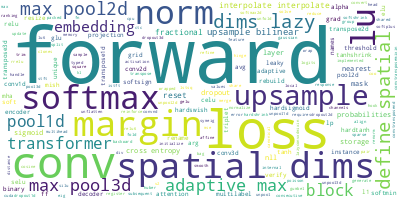

In [ ]:
flat_list = [word for filtered_text in filtered_texts for word in filtered_text]

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
filtered_string = ','.join(flat_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(filtered_string)
# Visualize the word cloud
wordcloud.to_image()

A lot of these words seem relevant. Let's apply LDA now.

### Applying LDA to extract the topics and associated words

We first need to give a numeric id to each word, and create a corpus.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(filtered_texts)
# Create Corpus
corpus = [id2word.doc2bow(text) for text in filtered_texts]

We can then apply LDA on the corpus. We can tweak the number of topics here.

In [ ]:
from pprint import pprint
# Number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=0)
# Print the words in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.055*"loss" + 0.054*"max" + 0.031*"upsample" + 0.024*"pool2d" + '
  '0.024*"pool3d" + 0.023*"margin" + 0.022*"adaptive" + 0.019*"norm" + '
  '0.018*"bilinear" + 0.016*"interpolate"'),
 (1,
  '0.147*"forward" + 0.030*"max" + 0.027*"lu" + 0.025*"loss" + 0.017*"softmax" '
  '+ 0.017*"upsample" + 0.014*"sigmoid" + 0.014*"pool2d" + 0.012*"adaptive" + '
  '0.012*"arg"'),
 (2,
  '0.084*"forward" + 0.059*"block" + 0.059*"transformer" + 0.030*"conv" + '
  '0.025*"layer" + 0.025*"ff" + 0.025*"encoder" + 0.025*"decoder" + '
  '0.022*"lazy" + 0.020*"spatial"'),
 (3,
  '0.028*"max" + 0.024*"loss" + 0.023*"storage" + 0.018*"upsample" + '
  '0.017*"unique" + 0.016*"rename" + 0.016*"rebuild" + 0.016*"resize" + '
  '0.016*"names" + 0.016*"norm"'),
 (4,
  '0.118*"forward" + 0.040*"conv" + 0.033*"max" + 0.029*"spatial" + '
  '0.027*"dims" + 0.027*"loss" + 0.023*"define" + 0.021*"upsample" + '
  '0.020*"lazy" + 0.017*"adaptive"')]


Let's now visualize the topics.

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/arc-pytorch'+str(num_topics))
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.066140 -0.003450       1        1  49.879029
4     -0.025339 -0.047916       2        1  15.777892
1      0.007559 -0.046658       3        1  15.776797
3      0.069309  0.058301       4        1  11.137830
2     -0.117669  0.039723       5        1   7.428452, topic_info=                Term       Freq      Total Category  logprob  loglift
47           forward  23.000000  23.000000  Default  30.0000  30.0000
93             block   2.000000   2.000000  Default  29.0000  29.0000
105      transformer   2.000000   2.000000  Default  28.0000  28.0000
75              conv   6.000000   6.000000  Default  27.0000  27.0000
87           spatial   4.000000   4.000000  Default  26.0000  26.0000
..               ...        ...        ...      ...      ...      ...
81   convtransposend   0.150286   1.183453   Topic5  -5.3615   0.5362
47           forward   2.696814  23.078758   Topic5  -2.4742   0.4530
90       transpose2d   0.200718   1.617124   Topic5  -5.0721   0.5133
143              max   0.256460  17.538047   Topic5  -4.8270  -1.6253
140             loss   0.229231  16.777659   Topic5  -4.9393  -1.6932

[233 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
106       1  0.671057  adaptive
106       2  0.134211  adaptive
106       3  0.134211  adaptive
106       4  0.134211  adaptive
108       1  0.801400     alpha
...     ...       ...       ...
173       2  0.098059  upsample
173       3  0.098059  upsample
173       4  0.098059  upsample
38        1  0.701693        v2
175       1  0.421043    verify

[192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

For a relevance metric lambda of 0.5, the topics seem to be very similar to the ones we discovered during phase one.

Note that LDA is non-deterministic, and that several runs can lead to better or worse results.

Let's extract the 20 first words for each topic.

In [ ]:
topics = lda_model.show_topics(num_topics=5, num_words=20, formatted=False)
topics_words = [[word[0] for word in topic[1]] for topic in topics]

In [ ]:
topics_words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['loss',
  'max',
  'upsample',
  'pool2d',
  'pool3d',
  'margin',
  'adaptive',
  'norm',
  'bilinear',
  'interpolate',
  'pool1d',
  'embedding',
  'fractional',
  'softmax',
  'entropy',
  'nll',
  'cross',
  'probabilities',
  'dropout',
  'forward'],
 ['forward',
  'max',
  'lu',
  'loss',
  'softmax',
  'upsample',
  'sigmoid',
  'pool2d',
  'adaptive',
  'arg',
  'margin',
  'pool3d',
  'embedding',
  'selu',
  'grad',
  'tanhshrink',
  'celu',
  'leaky',
  'elu',
  'mish'],
 ['forward',
  'block',
  'transformer',
  'conv',
  'layer',
  'ff',
  'encoder',
  'decoder',
  'lazy',
  'spatial',
  'reset',
  'dims',
  'define',
  'mha',
  'mask',
  'generate',
  'fn',
  'clones',
  'square',
  'activation'],
 ['max',
  'loss',
  'storage',
  'upsample',
  'unique',
  'rename',
  'rebuild',
  'resize',
  'names',
  'norm',
  'adaptive',
  'pool2d',
  'margin',
  'pool3d',
  'instance',
  'reduce',
  'pool1d',
  'istft',
  'convert',
  'interpolate'],
 ['forward',
  'conv',
  'max'

### Asking ChatGPT to label the topics

Now we have our 5 topics, but no labels.

We asked [ChatGPT](https://chat.openai.com/chat) to label each topic, giving it only the previous array.

#### Prompt

Here are the topics I got when performing topic modeling on a python deep learning framework.

[['loss',
  'max',
  'upsample',
  'pool2d',
  'pool3d',
  'margin',
  'adaptive',
  'norm',
  'bilinear',
  'interpolate',
  'pool1d',
  'embedding',
  'fractional',
  'softmax',
  'entropy',
  'nll',
  'cross',
  'probabilities',
  'dropout',
  'forward'],
 ['forward',
  'max',
  'lu',
  'loss',
  'softmax',
  'upsample',
  'sigmoid',
  'pool2d',
  'adaptive',
  'arg',
  'margin',
  'pool3d',
  'embedding',
  'selu',
  'grad',
  'tanhshrink',
  'celu',
  'leaky',
  'elu',
  'mish'],
 ['forward',
  'block',
  'transformer',
  'conv',
  'layer',
  'ff',
  'encoder',
  'decoder',
  'lazy',
  'spatial',
  'reset',
  'dims',
  'define',
  'mha',
  'mask',
  'generate',
  'fn',
  'clones',
  'square',
  'activation'],
 ['max',
  'loss',
  'storage',
  'upsample',
  'unique',
  'rename',
  'rebuild',
  'resize',
  'names',
  'norm',
  'adaptive',
  'pool2d',
  'margin',
  'pool3d',
  'instance',
  'reduce',
  'pool1d',
  'istft',
  'convert',
  'interpolate'],
 ['forward',
  'conv',
  'max',
  'spatial',
  'dims',
  'loss',
  'define',
  'upsample',
  'lazy',
  'adaptive',
  'lu',
  'pool2d',
  'softmax',
  'margin',
  'pool3d',
  'reset',
  'embedding',
  'pool1d',
  'bilinear',
  'transpose2d']]

Come up with a label for each of them.

#### Answer

Based on the common themes among the words in each topic, here are some possible labels for each topic:

1. Pooling and Loss Functions: This topic includes words related to various types of pooling operations (e.g. max, adaptive), interpolation (e.g. bilinear, interpolate), and loss functions (e.g. entropy, nll, cross).

2. Activation Functions: This topic includes words related to various activation functions commonly used in deep learning frameworks (e.g. softmax, sigmoid, tanhshrink, celu, leaky, elu, mish).

3. Transformer Blocks: This topic includes words related to building transformer blocks, a popular architecture for natural language processing tasks. It includes words related to different types of layers (e.g. transformer, conv), multi-head attention (mha), and activations (e.g. relu).

4. Data Storage and Manipulation: This topic includes words related to data storage and manipulation in deep learning frameworks. It includes words related to resizing and renaming tensors (e.g. resize, rename), normalization (e.g. norm), and instance-level operations (e.g. instance, reduce).

5. Convolutional Layers: This topic includes words related to building convolutional neural networks. It includes words related to convolutional layers (e.g. conv), pooling (e.g. max, pool2d, pool3d), and upsampling (e.g. upsample, bilinear).

These are indeed the topics we hoped to find, and are very similar to the ones we identified in phase one.

## 3. Extending the study to the modules directory

### Extracting all the relevant text from the files

Now that it seems to work on our subset of files, let's extend it to the modules directory.

In [ ]:
import os
import re
import glob

# Path to PyTorch library files
path = '/content/drive/MyDrive/arc-pytorch/pytorch/torch/nn/modules'

python_files = glob.glob(os.path.join(path, '**/*.py'), recursive=True)

# List to store relevant texts
texts = []

# Regular expression pattern for matching class and function names
class_func_pattern = r'((?:(?<=class\s)|(?<=def\s))\w+)'

# Iterate through all files in the PyTorch library directory
for filename in python_files:
    if filename.endswith('.py'):
        filepath = os.path.join(path, filename)
        
        # Read file contents
        with open(filepath, 'r', encoding="utf-8") as f:
            contents = f.read()
        
        # Extract relevant texts using regular expressions
        text = re.findall(class_func_pattern, contents)

        if text:
          texts.append(text)

In [ ]:
texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['SyncBatchNorm',
 'forward',
 'backward',
 'CrossMapLRN2d',
 'forward',
 'backward',
 'BackwardHookFunction',
 'forward',
 'backward']

### Cleaning the texts

Let's clean the text of each entry.

In [ ]:
def camel_or_pascal_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

def snake_case_split(identifier):
    return identifier.split("_")

filtered_texts = []
for text in texts:
  filtered_text = []
  for word in text:
    # Remove dunder function names
    if not word.startswith("__"):
      # Split snake case into multiple words
      if "_" in word:
        for subword in snake_case_split(word):
          filtered_text.append(subword.lower())
      # Split camelCase or PascalCase into multiple words
      elif not word.islower():
        for subword in camel_or_pascal_case_split(word):
          filtered_text.append(subword.lower())
      else:
        filtered_text.append(word)
      
      # Remove single character words and all-numbers words
      filtered_text = [word for word in filtered_text if len(word) > 1 and not word.isnumeric()]

  filtered_texts.append(filtered_text)

In [ ]:
filtered_texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['sync',
 'batch',
 'norm',
 'forward',
 'backward',
 'cross',
 'map',
 'lrn2d',
 'forward',
 'backward',
 'backward',
 'hook',
 'function',
 'forward',
 'backward']

Let's visualize the words based on their frequency

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


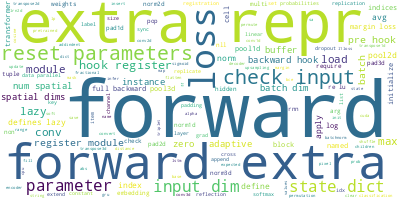

In [ ]:
flat_list = [word for filtered_text in filtered_texts for word in filtered_text]

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
filtered_string = ','.join(flat_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(filtered_string)
# Visualize the word cloud
wordcloud.to_image()

### Adding stopwords

A lot of words are very generic and irrelevant. Let's add stopwords.

The stopwords are a combination of those provided by nltk, python keywords and types, and irrelevant keywords.

Irrelevant keywords are obtained through a back and forth process of applying LDA and seeing which irrelevant words appear in a lot of topics. These words are just noise and need to be removed. We stop when the most dominant words in each topic are relevant.

In [ ]:
import keyword
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

IRRELEVANT_KW = ["torch", "self", "args", "kwargs", "*args", "**kwargs", "__init__", "python", "none", "true", "false", "type", "object", "name", "classproperty", "runtimeerror", "use", "call", "argument", "function", "isinstance", "want", "used", "dtype", "_dtype", "method", "getattr", "using","types", "ignore", "returns", "returned", "must", "see", "override", "n", "given","number", "append", "remove", "called", "instead", "create", "len", "defined", "property", "f", "key", "load", "__name__", "classes", "please", "foo", "super", "make", "length", "full", "needed", "internally", "lowering", "single", "default", "size", "input", "tensor", "output", "padding", "value", "shape", "dim", "batch", "math", "text", "attn", "attr", "repr", "index", "indices", "defines", "extra", "parameters", "module", "state", "check"]
TYPES = ["int", "float", "complex", "str", "list", "tuple", "range", "bytes", "bytearray", "memoryview", "dict", "bool", "set", "frozenset"]

STOPWORDS = list(set(list(stopwords.words()) + list(keyword.kwlist) + IRRELEVANT_KW + TYPES))

filtered_texts = [[word for word in filtered_text if word not in STOPWORDS] for filtered_text in filtered_texts]

In [ ]:
filtered_texts[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['sync',
 'norm',
 'forward',
 'backward',
 'cross',
 'map',
 'lrn2d',
 'forward',
 'backward',
 'backward',
 'hook',
 'forward',
 'backward']

Let's see if it improved.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


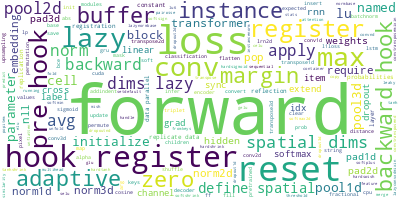

In [ ]:
flat_list = [word for filtered_text in filtered_texts for word in filtered_text]

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
filtered_string = ','.join(flat_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(filtered_string)
# Visualize the word cloud
wordcloud.to_image()

A lot of these words seem relevant. Let's apply LDA now.

### Applying LDA to extract the topics and associated words

We first need to give a numeric id to each word, and create a corpus.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(filtered_texts)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in filtered_texts]

We can then apply LDA on the corpus. We can tweak the number of topics here.

Tweaking the number of passes might also be an interesting thing to do, but we observe that we are limited in the number of different topics we can extract from the files. (More about that in the last section.) 

In [ ]:
from pprint import pprint
# Number of topics
num_topics = 10
# Number of passes
num_passes = 1
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       passes=num_passes
                                       random_state=0)
# Print the words in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.226*"forward" + 0.028*"reset" + 0.023*"loss" + 0.017*"cell" + '
  '0.017*"block" + 0.017*"transformer" + 0.017*"lu" + 0.014*"hidden" + '
  '0.014*"rnn" + 0.012*"lazy"'),
 (1,
  '0.062*"prob" + 0.032*"forward" + 0.032*"reset" + 0.032*"adaptive" + '
  '0.032*"loss" + 0.032*"softmax" + 0.032*"predict" + 0.003*"shuffle" + '
  '0.003*"lazy" + 0.003*"norm"'),
 (2,
  '0.074*"hook" + 0.072*"register" + 0.066*"forward" + 0.043*"reset" + '
  '0.033*"backward" + 0.027*"zero" + 0.024*"idx" + 0.024*"fill" + '
  '0.024*"embedding" + 0.024*"pretrained"'),
 (3,
  '0.141*"forward" + 0.119*"loss" + 0.049*"margin" + 0.028*"pixel" + '
  '0.027*"nll" + 0.018*"probabilities" + 0.016*"label" + 0.015*"triplet" + '
  '0.015*"unshuffle" + 0.015*"shuffle"'),
 (4,
  '0.098*"hook" + 0.074*"register" + 0.053*"forward" + 0.052*"lazy" + '
  '0.052*"instance" + 0.039*"pre" + 0.025*"backward" + 0.021*"buffers" + '
  '0.019*"loss" + 0.015*"norm3d"'),
 (5,
  '0.076*"forward" + 0.048*"pad2d" + 0.046*"pad3d" + 0.

Let's now visualize the topics.

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/arc-pytorch'+str(num_topics))
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.047822 -0.119475       1        1  23.884223
4      0.160028  0.060490       2        1  20.905538
8     -0.090387 -0.086629       3        1  18.427281
9     -0.217798  0.063407       4        1  12.358728
3      0.043448 -0.066402       5        1  12.205358
2      0.110945  0.051528       6        1   5.688223
5     -0.010789  0.081951       7        1   4.714512
1     -0.012924 -0.010170       8        1   1.217859
7     -0.030351  0.002176       9        1   0.299145
6      0.000007  0.023123      10        1   0.299134, topic_info=          Term       Freq       Total Category  logprob  loglift
42        loss   19.00000   19.000000  Default  30.0000  30.0000
2      forward  111.00000  111.000000  Default  29.0000  29.0000
3         hook   24.00000   24.000000  Default  28.0000  28.0000
125   register   20.00000   20.000000  Default  27.0000  27.0000
80        conv    6.00000    6.000000  Default  26.0000  26.0000
..         ...        ...         ...      ...      ...      ...
4        lrn2d    0.00894    3.070405  Topic10  -5.5568  -0.0270
95      cosine    0.00894    2.205999  Topic10  -5.5568   0.3036
139  embedding    0.00894    3.402462  Topic10  -5.5568  -0.1297
52      norm2d    0.00894    4.250125  Topic10  -5.5568  -0.3522
51      norm1d    0.00894    4.250092  Topic10  -5.5568  -0.3522

[469 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
41        3  0.620670           adaptive
41        4  0.310335           adaptive
205       3  0.641057  adaptiveavgpoolnd
206       3  0.625511  adaptivemaxpoolnd
160       2  0.645227                add
...     ...       ...                ...
57        1  0.197909               zero
57        2  0.197909               zero
57        4  0.197909               zero
57        6  0.197909               zero
57        7  0.197909               zero

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 9, 10, 4, 3, 6, 2, 8, 7])

Note that LDA is non-deterministic, and that several runs can lead to better or worse results.

Let's extract the 20 first words for each topic.

In [ ]:
topics = lda_model.show_topics(num_topics=10, num_words=20, formatted=False)
topics_words = [[word[0] for word in topic[1]] for topic in topics]

In [ ]:
topics_words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['forward',
  'reset',
  'loss',
  'cell',
  'block',
  'transformer',
  'lu',
  'hidden',
  'rnn',
  'lazy',
  'apply',
  'register',
  'weights',
  'hook',
  'pop',
  'extend',
  'encoder',
  'decoder',
  'gru',
  'norm1d'],
 ['prob',
  'forward',
  'reset',
  'adaptive',
  'loss',
  'softmax',
  'predict',
  'shuffle',
  'lazy',
  'norm',
  'hook',
  'upsampling',
  'require',
  'zero',
  'channel',
  'fold',
  'instance',
  'dropout',
  'pixel',
  'register'],
 ['hook',
  'register',
  'forward',
  'reset',
  'backward',
  'zero',
  'idx',
  'fill',
  'embedding',
  'pretrained',
  'pre',
  'named',
  'linear',
  'buffer',
  'bag',
  'parameter',
  'registration',
  'modules',
  'hooks',
  'buffers'],
 ['forward',
  'loss',
  'margin',
  'pixel',
  'nll',
  'probabilities',
  'label',
  'triplet',
  'unshuffle',
  'shuffle',
  'l1loss',
  'embedding',
  'hook',
  'register',
  'bce',
  'classification',
  'soft',
  'logits',
  'infinity',
  'ctc'],
 ['hook',
  'register',
  'forwa

### Asking ChatGPT to label the topics

Now we have our 10 topics, but no labels.

We asked ChatGPT to label each topic, giving it only the previous array.

#### Prompt

Here are the topics I got when performing topic modeling on a python deep learning framework.

[['forward',
  'reset',
  'loss',
  'cell',
  'block',
  'transformer',
  'lu',
  'hidden',
  'rnn',
  'lazy',
  'apply',
  'register',
  'weights',
  'hook',
  'pop',
  'extend',
  'encoder',
  'decoder',
  'gru',
  'norm1d'],
 ['prob',
  'forward',
  'reset',
  'adaptive',
  'loss',
  'softmax',
  'predict',
  'shuffle',
  'lazy',
  'norm',
  'hook',
  'upsampling',
  'require',
  'zero',
  'channel',
  'fold',
  'instance',
  'dropout',
  'pixel',
  'register'],
 ['hook',
  'register',
  'forward',
  'reset',
  'backward',
  'zero',
  'idx',
  'fill',
  'embedding',
  'pretrained',
  'pre',
  'named',
  'linear',
  'buffer',
  'bag',
  'parameter',
  'registration',
  'modules',
  'hooks',
  'buffers'],
 ['forward',
  'loss',
  'margin',
  'pixel',
  'nll',
  'probabilities',
  'label',
  'triplet',
  'unshuffle',
  'shuffle',
  'l1loss',
  'embedding',
  'hook',
  'register',
  'bce',
  'classification',
  'soft',
  'logits',
  'infinity',
  'ctc'],
 ['hook',
  'register',
  'forward',
  'lazy',
  'instance',
  'pre',
  'backward',
  'buffers',
  'loss',
  'norm3d',
  'norm2d',
  'infer',
  'initialize',
  'norm1d',
  'apply',
  'named',
  'data',
  'parallel',
  'save',
  'parameter'],
 ['forward',
  'pad2d',
  'pad3d',
  'pad1d',
  'zero',
  'constant',
  'replication',
  'reflection',
  'pairwise',
  'similarity',
  'cosine',
  'distance',
  'register',
  'hook',
  'reflectionpadnd',
  'constantpadnd',
  'replicationpadnd',
  'backward',
  'named',
  'pre'],
 ['forward',
  'reset',
  'shuffle',
  'lazy',
  'channel',
  'hook',
  'norm',
  'require',
  'backward',
  'upsampling',
  'loss',
  'instance',
  'fold',
  'prob',
  'dropout',
  'register',
  'pixel',
  'zero',
  'linear',
  'initialize'],
 ['forward',
  'loss',
  'conv',
  'margin',
  'dims',
  'spatial',
  'define',
  'nll',
  'lazy',
  'label',
  'soft',
  'probabilities',
  'classification',
  'l1loss',
  'transpose3d',
  'triplet',
  'embedding',
  'bce',
  'conv1d',
  'conv3d'],
 ['forward',
  'max',
  'backward',
  'avg',
  'norm',
  'pool2d',
  'adaptive',
  'pool1d',
  'pool3d',
  'require',
  'reset',
  'map',
  'cross',
  'lrn2d',
  'pop',
  'hook',
  'fractional',
  'sync',
  'flatten',
  'unflatten'],
 ['forward',
  'conv',
  'spatial',
  'dims',
  'max',
  'lazy',
  'define',
  'dropout',
  'adaptive',
  'pool2d',
  'pool3d',
  'avg',
  'alpha',
  'upsampling',
  'reset',
  'transpose2d',
  'conv2d',
  'transpose1d',
  'conv3d',
  'conv1d']]

Come up with a label for each of them.

#### Answer

Based on the words present in each topic, here are some possible labels for the topics:

1. Recurrent Neural Networks (RNNs) and Transformers
2. Probability and Softmax
3. Modules and Buffers
4. Loss Functions
5. Model Training and Saving
6. Padding and Convolution
7. Image Processing
8. Convolutional Neural Networks (CNNs)
9. Pooling and Normalization
10. More CNNs

Considering that the modules folder is constituted of the following files:

- _functions.py
- activation.py
- adaptive.py
- batchnorm.py
- channelshuffle.py
- container.py
- conv.py
- distance.py
- dropout.py
- flatten.py
- fold.py
- instancenorm.py
- lazy.py
- linear.py
- loss.py
- module.py
- normalization.py
- padding.py
- pixelshuffle.py
- pooling.py
- rnn.py
- sparse.py
- transformer.py
- upsampling.py
- utils.py

We identified a good part of the topics present in this directory.

However, if we increase the number of topics, instead of seeing new topics appear, topics that are similar to others are created. More on that in the last limitations section.

### File-Topic Relationship

As an experiment, let's try to map which topics are related to which file.

Let's begin by making an array containing all of the file names in the same order as the corpus.

In [ ]:
import os
import glob
import ast

# Path to PyTorch library files
path = '/content/drive/MyDrive/arc-pytorch/pytorch/torch/nn/modules'

python_files = glob.glob(os.path.join(path, '**/*.py'), recursive=True)

python_files = [word.split("/")[-1] for word in python_files][1:]

In [ ]:
python_files

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['_functions.py',
 'activation.py',
 'adaptive.py',
 'batchnorm.py',
 'channelshuffle.py',
 'container.py',
 'conv.py',
 'distance.py',
 'dropout.py',
 'flatten.py',
 'fold.py',
 'instancenorm.py',
 'lazy.py',
 'linear.py',
 'loss.py',
 'module.py',
 'normalization.py',
 'padding.py',
 'pixelshuffle.py',
 'pooling.py',
 'rnn.py',
 'sparse.py',
 'transformer.py',
 'upsampling.py',
 'utils.py']

Let's make a mapping of the topics id with the label given by ChatGPT.

In [ ]:
topic_mapping = {
    0: "Recurrent Neural Networks (RNNs) and Transformers",
    1: "Probability and Softmax",
    2: "Modules and Buffers",
    3: "Loss Functions",
    4: "Model Training and Saving",
    5: "Padding and Convolution",
    6: "Image Processing",
    7: "Convolutional Neural Networks (CNNs)",
    8: "Pooling and Normalization",
    9: "Convolutional Neural Networks (CNNs)"
}
# Note that I combined topics 7 and 9 because they have similar labels.

Let's see, for each file, what the prevalence of each topic is.

In [ ]:
files_topics = {}

for i, doc in enumerate(corpus):
    files_topics[python_files[i]] = [(topic_mapping[topic_id], freq) for topic_id, freq in lda_model.get_document_topics(doc)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='file'>

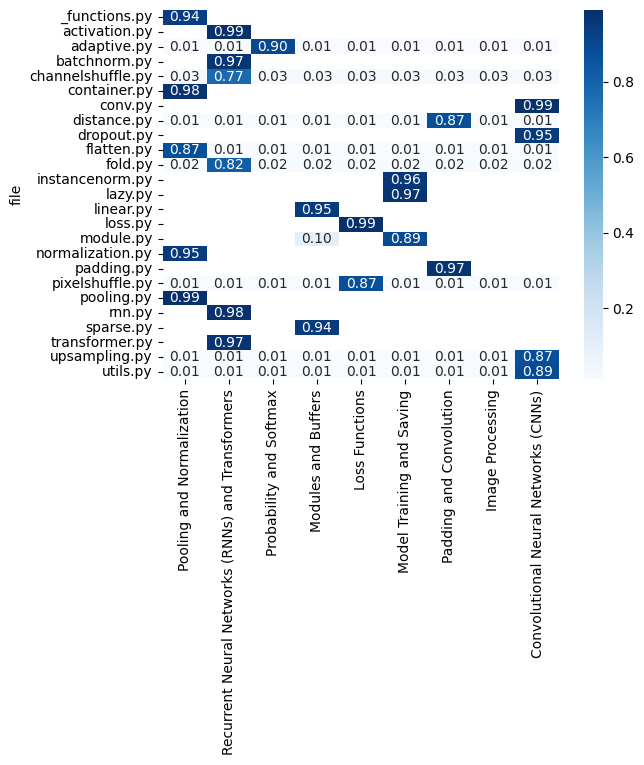

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of dictionaries to store the data for the heatmap
data = []
for file, topics in files_topics.items():
    row = {"file": file}
    for topic, freq in topics:
        row[f"{topic}"] = freq
    data.append(row)

# Create a DataFrame from the data and set the 'file' column as the index
df = pd.DataFrame(data).set_index("file")

# Create a heatmap using seaborn
sns.heatmap(df, cmap="Blues", annot=True, fmt=".2f")

The sum of topic probabilities for a given document in LDA does not equal 1 because it represents the likelihood of a word belonging to each topic, rather than the probability of each topic being present in the document.

Let's now make a dictionary describing the most dominant topic in each file.

In [ ]:
files_topics = {}

for i, doc in enumerate(corpus):
    max_prob_tuple = max(lda_model.get_document_topics(doc), key=lambda x: x[1])
    most_dominant_topic = max_prob_tuple[0]

    files_topics[python_files[i]] = topic_mapping[most_dominant_topic]

In [ ]:
files_topics

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'_functions.py': 'Pooling and Normalization',
 'activation.py': 'Recurrent Neural Networks (RNNs) and Transformers',
 'adaptive.py': 'Probability and Softmax',
 'batchnorm.py': 'Recurrent Neural Networks (RNNs) and Transformers',
 'channelshuffle.py': 'Recurrent Neural Networks (RNNs) and Transformers',
 'container.py': 'Pooling and Normalization',
 'conv.py': 'Convolutional Neural Networks (CNNs)',
 'distance.py': 'Padding and Convolution',
 'dropout.py': 'Convolutional Neural Networks (CNNs)',
 'flatten.py': 'Pooling and Normalization',
 'fold.py': 'Recurrent Neural Networks (RNNs) and Transformers',
 'instancenorm.py': 'Model Training and Saving',
 'lazy.py': 'Model Training and Saving',
 'linear.py': 'Modules and Buffers',
 'loss.py': 'Loss Functions',
 'module.py': 'Model Training and Saving',
 'normalization.py': 'Pooling and Normalization',
 'padding.py': 'Padding and Convolution',
 'pixelshuffle.py': 'Loss Functions',
 'pooling.py': 'Pooling and Normalization',
 'rnn.py': 'Rec

This can be useful to understand what a specific file is about.

However, to gain an understanding of the whole system, it would be more useful to know the files that are related to each topic, along with the probability of the topic being present in the document.

Let's do that.

In [ ]:
from collections import defaultdict

topics_files = defaultdict(list)

for i, doc in enumerate(corpus):
  for topic_id, freq in lda_model.get_document_topics(doc):
    topics_files[topic_mapping[topic_id]].append((python_files[i], str(freq)))

for topic, files_tuples in topics_files.items():
  files_tuples_sorted = sorted(files_tuples, key=lambda x: x[1], reverse=True)
  topics_files[topic] = files_tuples_sorted

In [ ]:
import json

# Print the dictionary in a readable way
formatted_topic_files = json.dumps(topics_files, indent=4)
print(formatted_topic_files)

{
    "Pooling and Normalization": [
        [
            "pooling.py",
            "0.98749924"
        ],
        [
            "container.py",
            "0.97749746"
        ],
        [
            "normalization.py",
            "0.9470547"
        ],
        [
            "_functions.py",
            "0.9357059"
        ],
        [
            "flatten.py",
            "0.87142074"
        ],
        [
            "channelshuffle.py",
            "0.025003264"
        ],
        [
            "fold.py",
            "0.0200041"
        ],
        [
            "distance.py",
            "0.014290009"
        ],
        [
            "pixelshuffle.py",
            "0.014287879"
        ],
        [
            "upsampling.py",
            "0.014286886"
        ],
        [
            "utils.py",
            "0.012500364"
        ],
        [
            "adaptive.py",
            "0.011116121"
        ]
    ],
    "Recurrent Neural Networks (RNNs) and Transformers": [
        

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This seems very promising!

This is the first step to developing a solution that takes users directly to the related files when they click on a topic.

# Reflection and Limitations

A lot of the steps in this workflow expose limitations.

The ones we have identified are:

- It is very hard to only keep the relevant words in the files. We have tried several ways and obtained the best results using class and function names. An interesting approach that was tried was taking all of the words in the files and, before formatting the words, removing all of the words that matched an English dictionary. However, the time complexity of that approach is too high and not really doable in practice.

- Choosing the stopwords is tricky. It can be time-consuming, and the approach we took was looking at the words that were not relevant and that were appearing in several topics (noise), removing them, and repeating the process until we were left with a majority of relevant terms.

- Bag of words does not take context into account. It might be more interesting to mix LDA with word embeddings, as demonstrated in [this paper](https://arxiv.org/pdf/1605.02019.pdf). However, the python library for LDA2Vec is poorly documented.

- LDA is non-deterministic. It might take a few attempts to come up with meaningful results.

- Choosing the number of topics is hard. This is done through trial and error, and there is a limitation to the number of topics LDA can detect. At some point, if the number of topics is too high, LDA detects several similar topics that could be combined into one.

- Increasing the number of passes might lead to better results, but we are soon limited by the number of relevant topics that can be extracted (see comment above).

- ChatGPT is really good but also non-deterministic. It might also take several tries to come up with the proper labels for the topics.

- The other steps of the ARC technique do not seem relevant to apply in this context. Brick recovery (step 2 of the ARC technique) clusters the files into higher-level bricks. However, we would need a lot of files to obtain meaningful results. But due to the limitations in the number of topics we can extract from the files (see comment above), it is not possible for now. The authors of the paper were also very vague about how they conducted this step.

- Due to the timing constraints of the project, the code in this notebook is not robust nor optimised and is a bit sketchy. It, therefore, needs to be adapted to be used on a different repository.

# References

Joshua Garcia, Daniel Popescu, Chris Mattmann, Nenad Medvidovic, and Yuan-
fang Cai. [*Enhancing architectural recovery using concerns*](https://www.cs.drexel.edu/~yfcai/papers/2011/ASE2011_short.pdf). In 2011 26th
IEEE/ACM International Conference on Automated Software Engineering (ASE
2011), pages 552–555. IEEE, 2011.

Christopher E Moody. [*Mixing dirichlet topic models and word embeddings to
make lda2vec*](https://arxiv.org/pdf/1605.02019.pdf). arXiv preprint arXiv:1605.02019, 2016.

OpenAI. [*ChatGPT*](https://chat.openai.com/chat) (GPT 3.5, Mar 23 version) [Large Language Model], 2023